## Unsupervised learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

%matplotlib inline

/Users/ivansvininnikov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## EDA

In [2]:
db = pd.read_csv("Country-data.csv")

In [3]:
db.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
db.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
db.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
db_characteristics = db.drop(['country'], axis=1)
db_char = db_characteristics
db_char.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


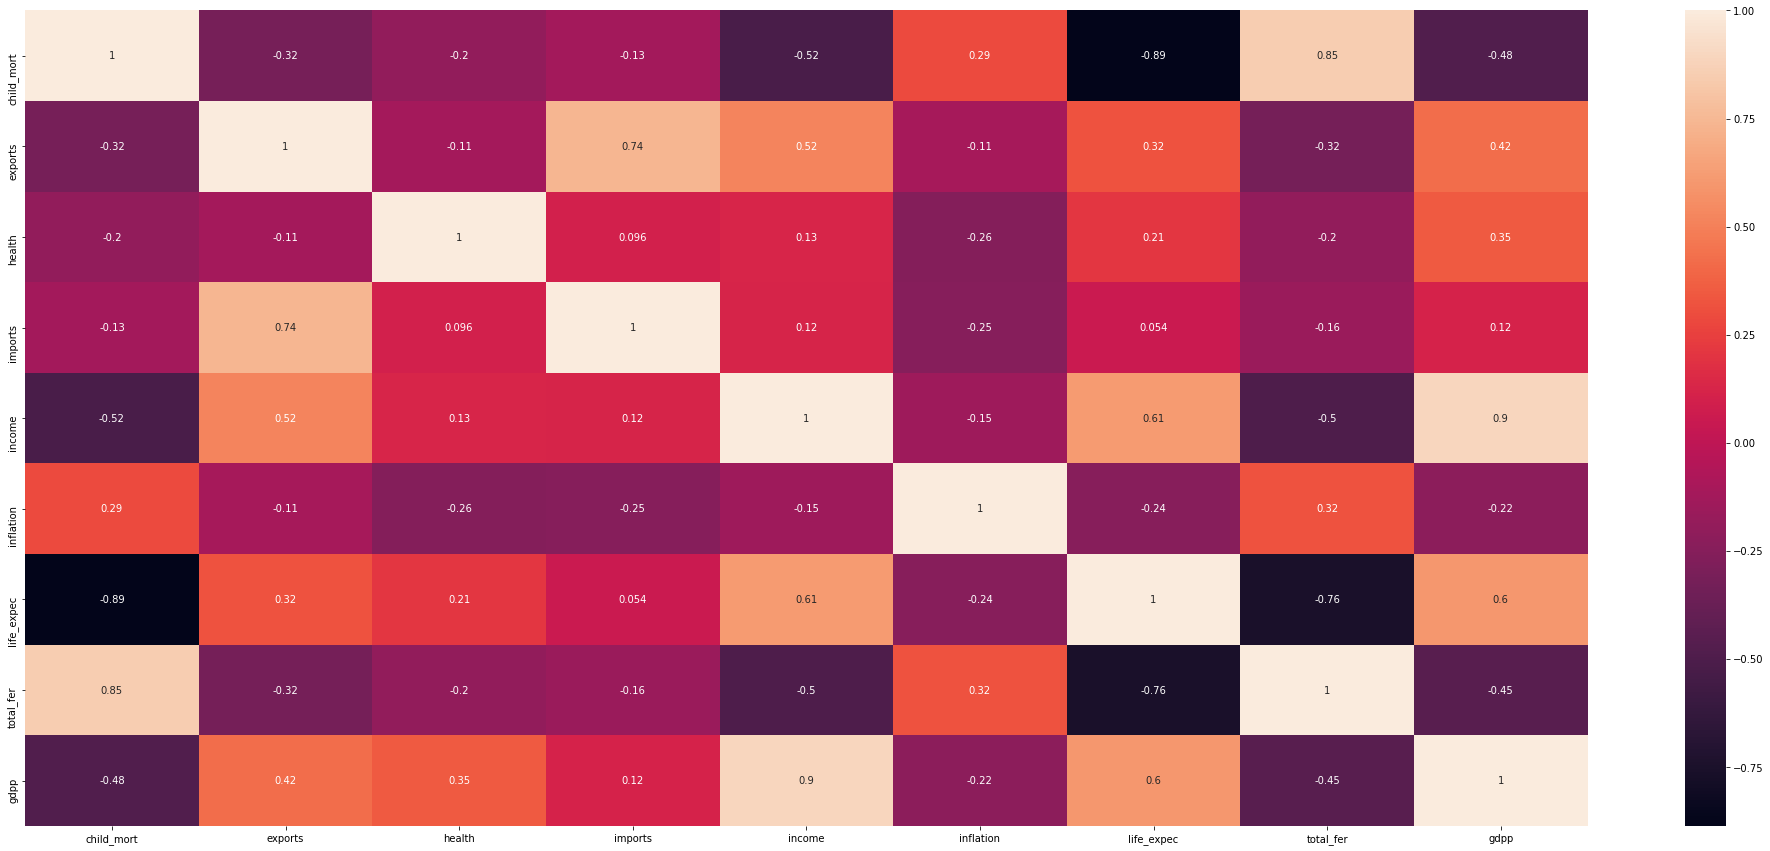

In [8]:
plt.figure(figsize=(35,15))
cor = db_char.corr()
sns.heatmap(cor, annot=True)
plt.show()

## Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(db_char), columns = db_char.columns) 
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [10]:
df_scaled.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-3.722904e-17,2.127373e-16,5.504579e-16,2.765585e-16,-7.977650e-17,-1.063687e-17,3.696311e-16,3.044803e-16,5.850277e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


## PCA

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(df_scaled)

col_names = df_scaled.columns.tolist()

pca_df = pd.DataFrame(data=pca_data, columns=['PCA_' + str(i) for i in range(1, pca.n_components_+1)])
pca_df.columns = col_names
print(pca_df.head())

   child_mort   exports    health   imports    income  inflation  life_expec  \
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310  -0.254597    0.383000   
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677   0.084579    0.248919   
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475  -0.401696   -0.087214   
3   -2.932423  1.695555  1.525044  0.839625 -0.273209  -0.547996   -0.440835   
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007  -0.206919    0.241978   

   total_fer      gdpp  
0   0.415076 -0.014148  
1  -0.221042  0.173316  
2  -0.184162  0.084037  
3  -0.355998 -0.091339  
4  -0.023681  0.094270  


In [12]:
pca_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270
...,...,...,...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0.009059,-0.098738,0.521886,-0.497803
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0.097274,0.206735,-0.078805,-0.275735
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,0.051607,-0.143627,-0.217590,-0.036522
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,-0.540917,0.060256,0.089495,-0.096049


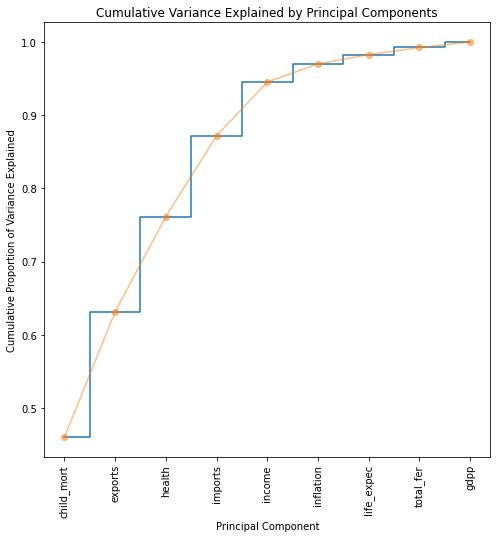

In [13]:
plt.rcParams['figure.figsize'] = 8, 8
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')


plt.xticks(range(1, len(pca.explained_variance_ratio_)+1), list(df_scaled.columns), rotation=90)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), 'o-', alpha=0.5)


plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()

In [14]:
data = pca_df.drop(['inflation', 'life_expec', 'total_fer', 'gdpp'], axis=1)
data

,child_mort,exports,health,imports,income
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365


## K-means

/Users/ivansvininnikov/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ivansvininnikov/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ivansvininnikov/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ivansvininnikov/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

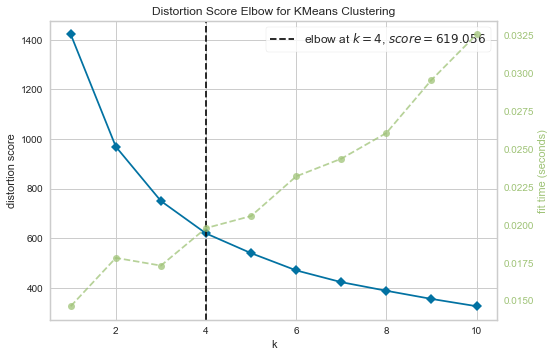

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,11)) # Instantiate a KElbowVisualizer object
visualizer.fit(data)
visualizer.show()

In [16]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
labels = kmeans.labels_

predictions_pca = pd.Series(labels)

print("Cluster assignments:\n", labels)

Cluster assignments:
 [0 3 3 0 3 3 3 2 2 3 2 3 3 3 3 2 3 0 3 3 3 0 3 2 3 0 0 3 0 2 3 0 0 3 3 3 0
 0 0 3 0 3 2 2 2 3 3 3 3 0 0 3 3 2 2 0 0 3 2 0 2 3 3 0 0 3 0 3 2 3 3 3 0 2
 2 2 3 2 3 3 0 0 2 3 0 3 3 0 0 3 3 1 3 0 0 3 3 0 1 0 3 3 3 3 3 3 0 3 0 3 2
 2 0 0 2 3 0 3 3 3 3 3 2 2 3 3 0 3 3 0 3 3 0 1 3 2 3 0 2 2 3 3 0 3 2 2 3 0
 3 0 0 3 3 3 3 0 3 2 2 2 3 3 3 3 3 0 0]


/Users/ivansvininnikov/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
unique_labels, counts = np.unique(labels, return_counts=True)
percentages = counts / len(labels) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}")
print("")

print("Percentages:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {percentages[i]:.2f}%")

Value counts:
Class 0: 47
Class 1: 3
Class 2: 32
Class 3: 85

Percentages:
Class 0: 28.14%
Class 1: 1.80%
Class 2: 19.16%
Class 3: 50.90%


In [19]:
print('Silhouette Score:', '%.2f'%silhouette_score(data, predictions_pca))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(data, predictions_pca))

Silhouette Score: 0.32
Davies Bouldin Score: 0.98


## Hierarchal clustering

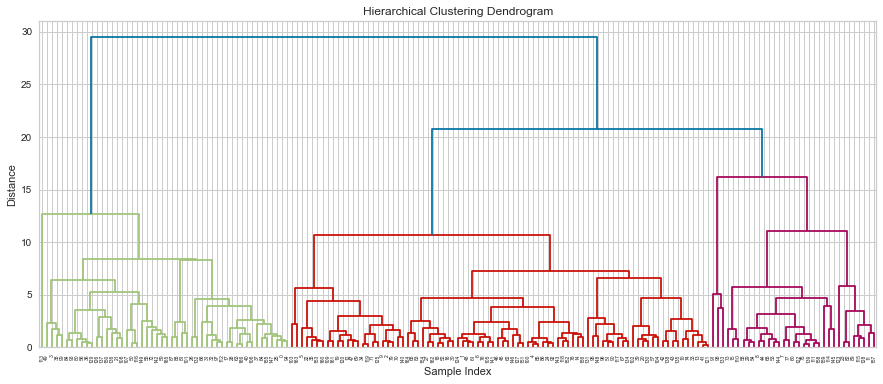

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


Z = linkage(data, method='ward', metric='euclidean')

plt.figure(figsize=(15,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(data)
labels = clustering.labels_

print("Cluster assignments:\n", labels)

Cluster assignments:
 [1 2 2 1 2 2 2 0 0 2 2 0 2 2 2 0 2 1 2 2 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 2 2 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 2 0 2 0 2 2 1 1 0 2 1 2 2 1 1 0 2 0 2 1 1 2 2 1 0 1 2 1 2 2 2 2 1 1 1 2 0
 0 1 1 0 0 1 2 2 2 2 2 0 0 2 2 1 2 0 1 2 2 1 0 2 2 1 1 2 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]


In [22]:
predictions_heirarch = pd.Series(labels)
predictions_heirarch

0      1
1      2
2      2
3      1
4      2
      ..
162    2
163    2
164    2
165    1
166    1
Length: 167, dtype: int64

In [23]:
unique_labels, counts = np.unique(labels, return_counts=True)
percentages = counts / len(labels) * 100

# Print the value counts and percentages
print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}")
print("")

print("Percentages:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {percentages[i]:.2f}%")

Value counts:
Class 0: 33
Class 1: 50
Class 2: 84

Percentages:
Class 0: 19.76%
Class 1: 29.94%
Class 2: 50.30%


In [24]:
print('Silhouette Score:', '%.2f'%silhouette_score(data, predictions_heirarch))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(data, predictions_heirarch))

Silhouette Score: 0.30
Davies Bouldin Score: 1.25


## DBscan clustering

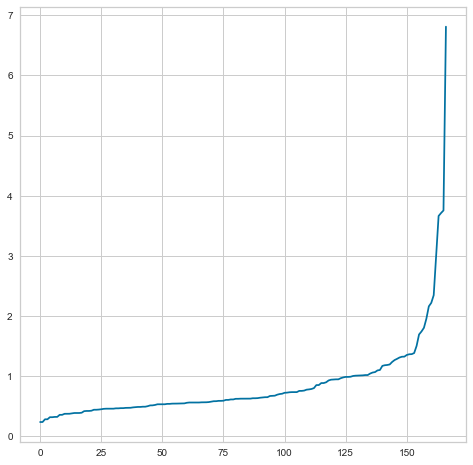

In [25]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.rcParams['figure.figsize'] = 8,8
plt.plot(distances)

In [26]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 1.3, min_samples = 4 )# minimum samples is set to 8
db.fit(data)

labels = db.labels_

print("Cluster assignments:\n", labels)

Cluster assignments:
 [ 0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0 -1 -1  0  0  0  0 -1 -1  0  0 -1  0  0  0  0
  0  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0  0  0 -1  0  0  0]


In [27]:
predictions_db = pd.Series(labels)
predictions_db

0      0
1      0
2      0
3     -1
4      0
      ..
162    0
163   -1
164    0
165    0
166    0
Length: 167, dtype: int64

In [28]:
unique_labels, counts = np.unique(labels, return_counts=True)
percentages = counts / len(labels) * 100

# Print the value counts and percentages
print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}")
print("")

print("Percentages:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {percentages[i]:.2f}%")

Value counts:
Class -1: 27
Class 0: 140

Percentages:
Class -1: 16.17%
Class 0: 83.83%


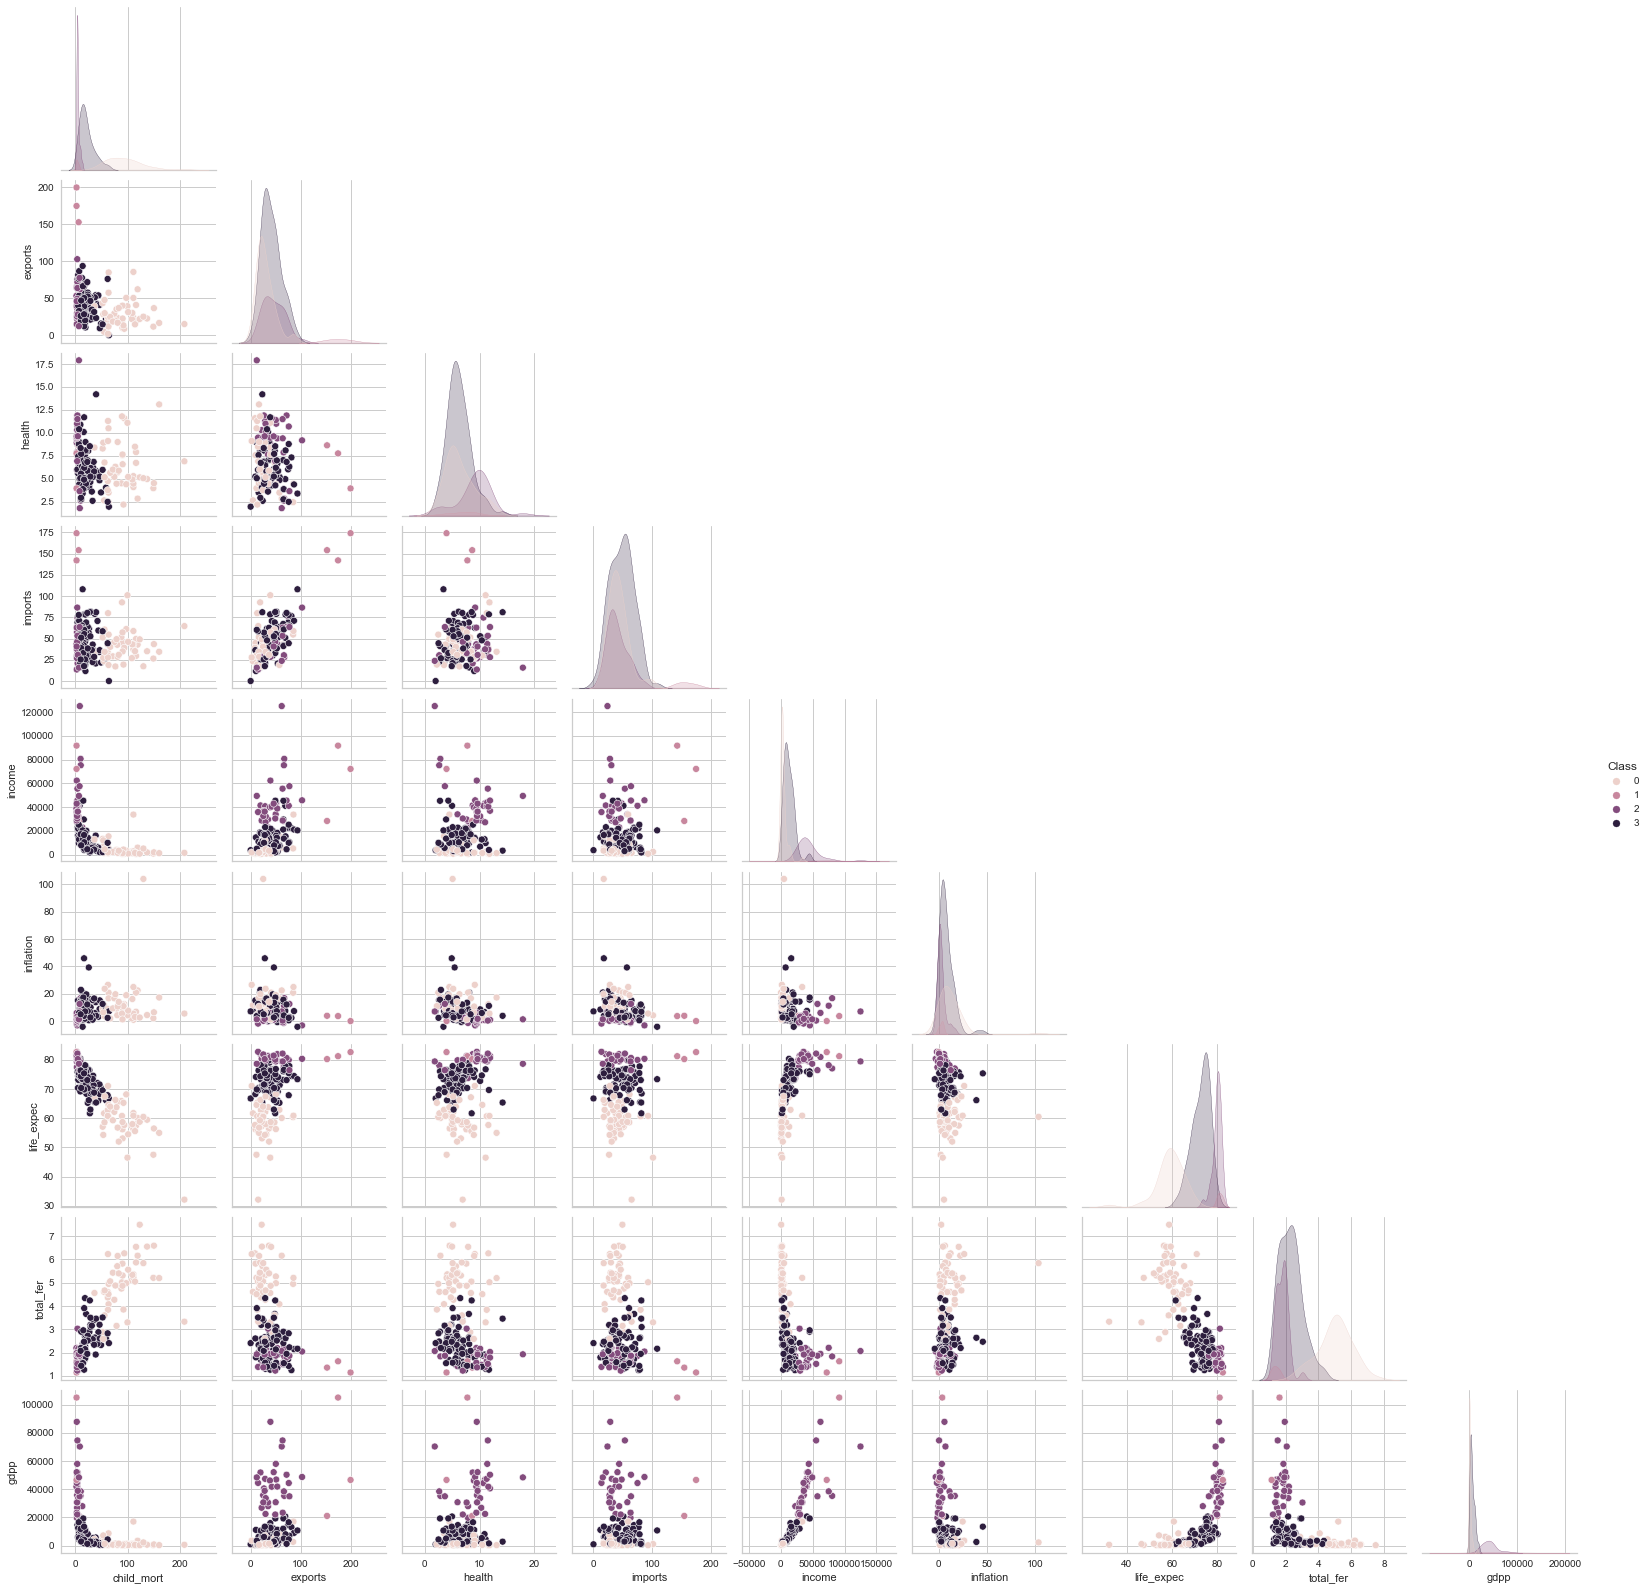

In [29]:
data_kmeans = db_characteristics.copy()
data_kmeans['Class'] = predictions_pca
sns.pairplot(data_kmeans, hue = "Class", corner = True)

In [30]:
data_kmeans.groupby('Class').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Class,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
1,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
2,5.181250,46.118750,9.088437,40.584375,44021.875000,2.513844,80.081250,1.788437,42118.750000
3,21.690588,41.073988,6.197059,47.914893,12671.411765,7.609341,72.871765,2.300706,6519.552941


In [31]:
unique_labels, counts = np.unique(labels, return_counts=True)
percentages = counts / len(labels) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}")
print("")

print("Percentages:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {percentages[i]:.2f}%")

Value counts:
Class -1: 27
Class 0: 140

Percentages:
Class -1: 16.17%
Class 0: 83.83%


In [32]:
print('Silhouette Score:', '%.2f'%silhouette_score(data, predictions_db))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(data, predictions_db))

Silhouette Score: 0.33
Davies Bouldin Score: 3.22
